# **Machine Learning Mini Project**

# **Title: Heart Disease Prediction Using Machine Learning Classification**

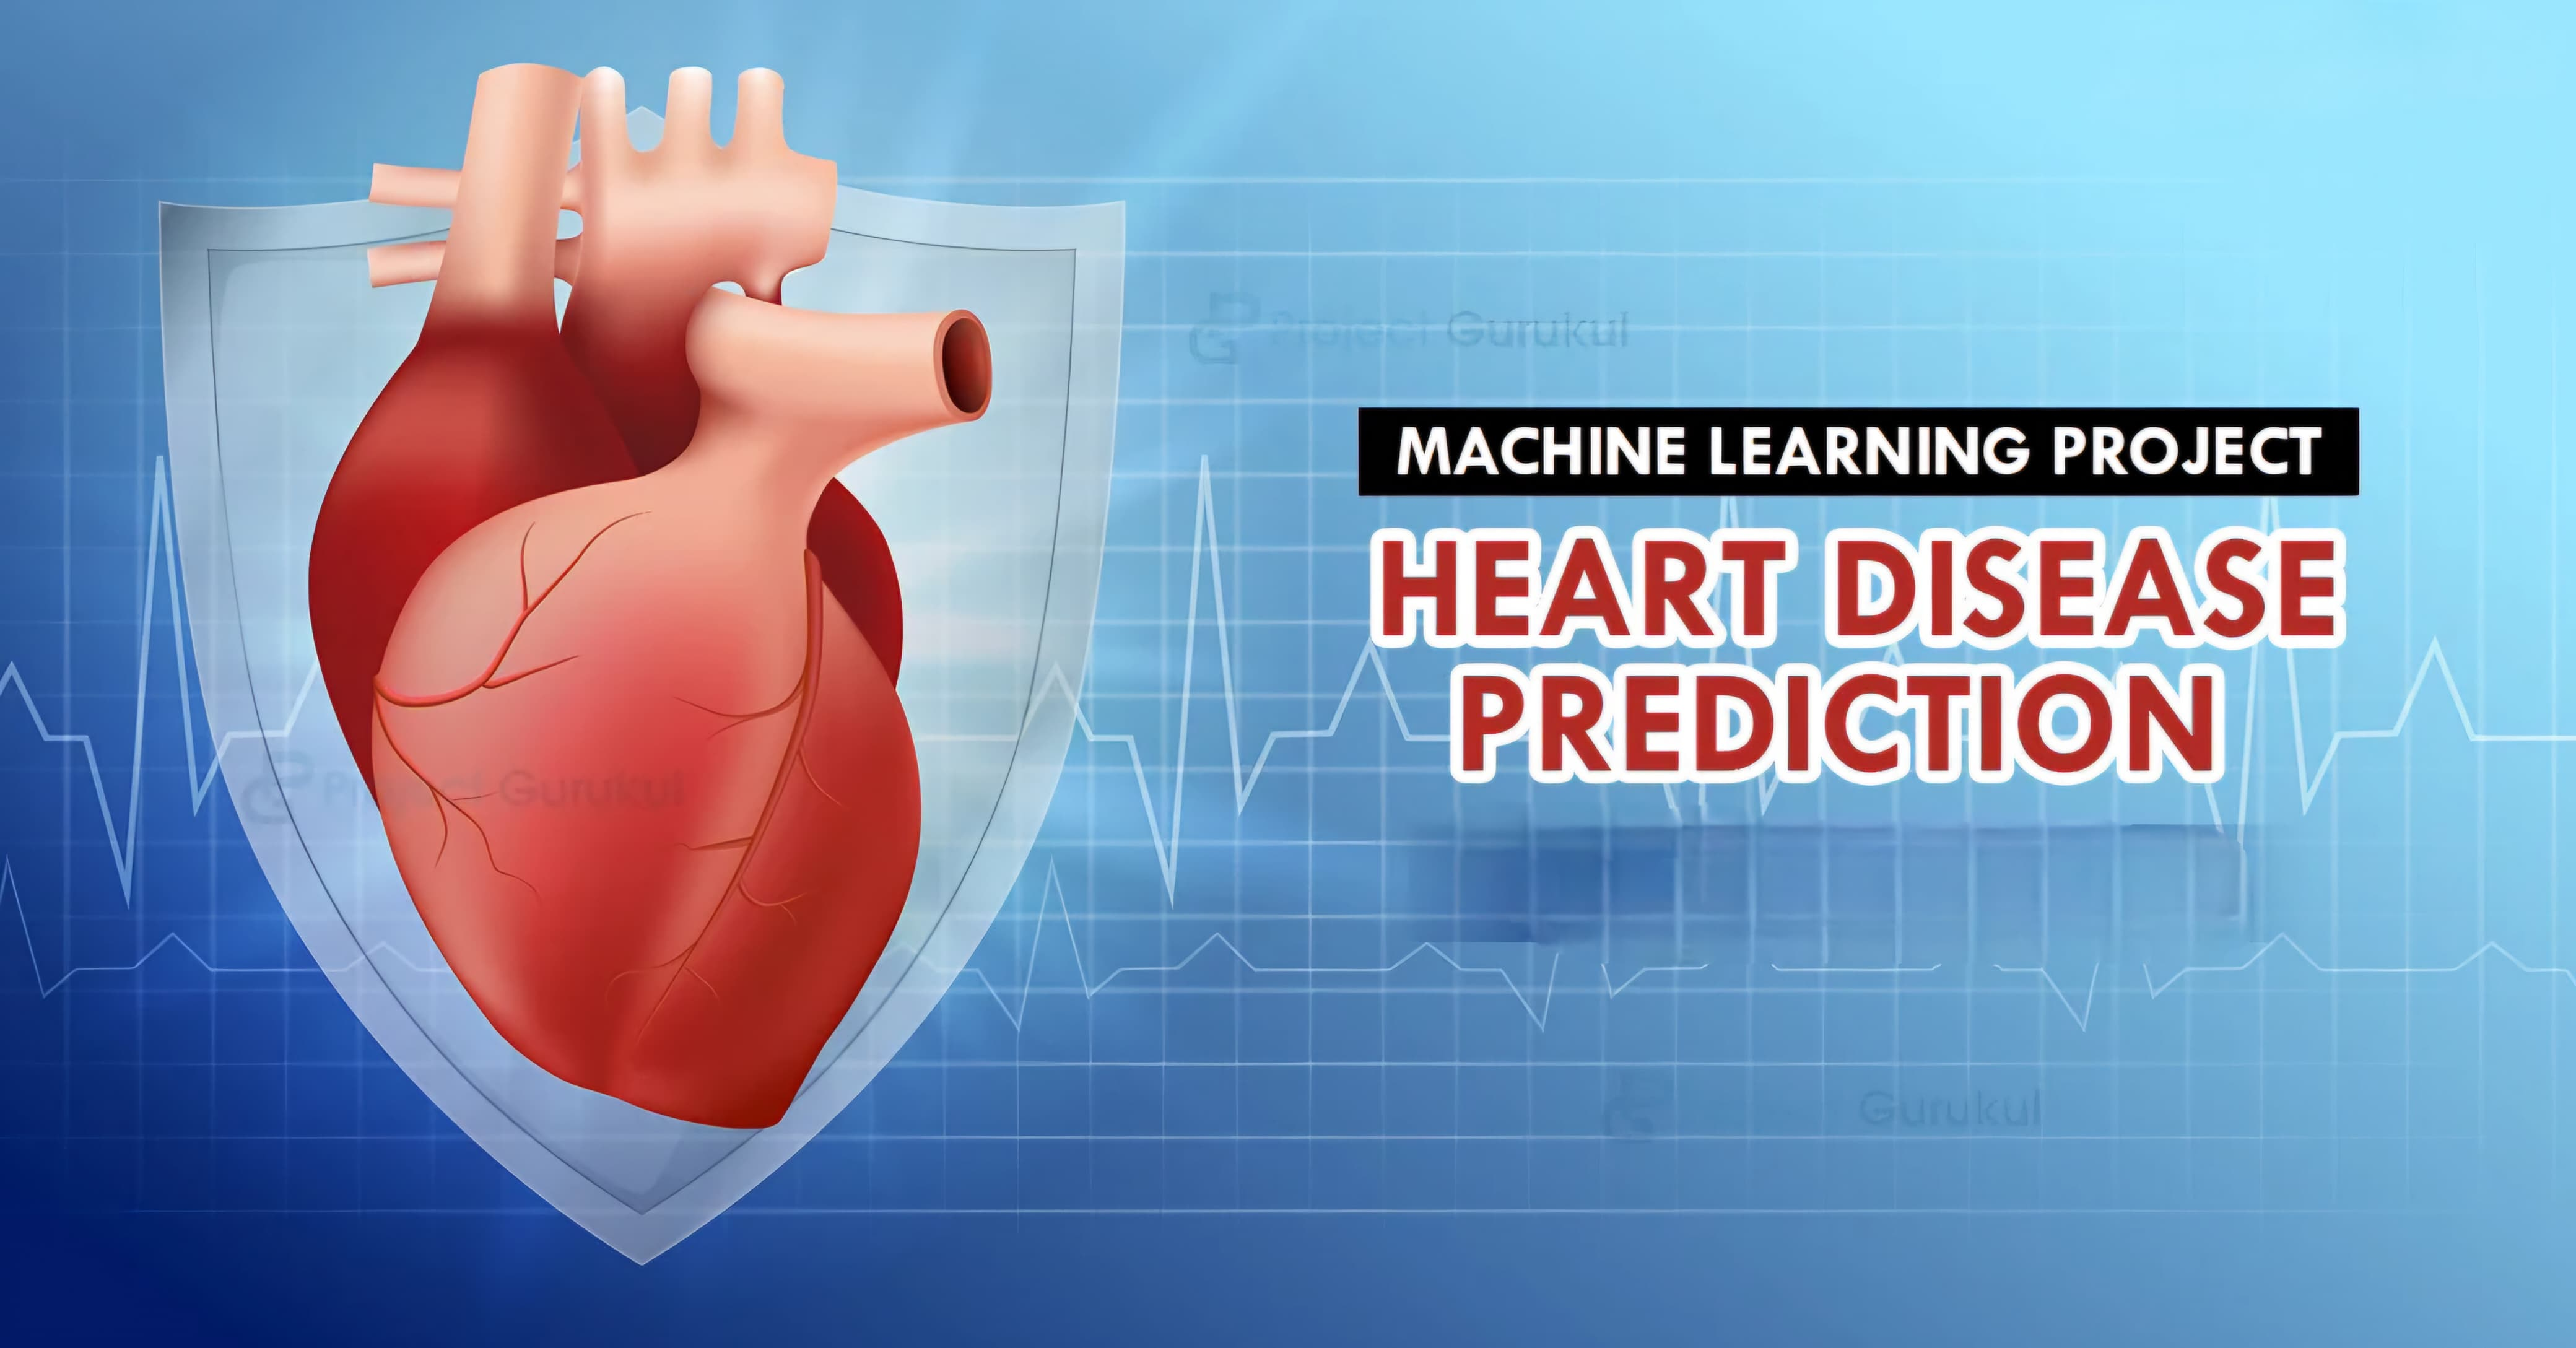

### **Aim**: To develop and evaluate multiple machine learning models for predicting heart disease based on clinical and demographic data, identifying the model with the highest performance metrics.

# **Objective:**

* **Data Exploration and Preprocessing**: Perform data exploration to understand the dataset's features, followed by preprocessing steps like encoding categorical features, imputing missing values, and scaling numeric features to prepare the data for model training.

* **Model Training and Evaluation**: Train various classification models, including Logistic Regression, K-Nearest Neighbors (KNN), Naive Bayes, Random Forest, and Support Vector Machine (SVM), and evaluate them using metrics such as accuracy, precision, recall, F1-score, sensitivity, and specificity.

* **Model Comparison**: Compare the performance of each model based on the evaluation metrics and ROC-AUC scores, identifying the most accurate and reliable model for predicting heart disease.  

* **Visualization**: Present the model comparison visually using metrics plots and ROC-AUC curves, as well as confusion matrices to highlight the predictive power of each model.







Importing neccesary libraraies and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
)



In [ ]:
data = pd.read_csv('/content/Heart.csv')

In [ ]:
data.describe()

Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000  
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000  
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000  
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000

from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sex'].plot(kind='hist', bins=20, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['RestBP'].plot(kind='hist', bins=20, title='RestBP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Unnamed: 0', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Age', y='Sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Sex', y='RestBP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='RestBP', y='Chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Sex'].plot(kind='line', figsize=(8, 4), title='Sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['RestBP'].plot(kind='line', figsize=(8, 4), title='RestBP')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.head()

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sex'].plot(kind='hist', bins=20, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['RestBP'].plot(kind='hist', bins=20, title='RestBP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('ChestPain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Thal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('AHD').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Unnamed: 0', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Age', y='Sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Sex', y='RestBP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='RestBP', y='Chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ChestPain')):
  _plot_series(series, series_name, i)
  fig.legend(title='ChestPain', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Thal')):
  _plot_series(series, series_name, i)
  fig.legend(title='Thal', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('AHD')):
  _plot_series(series, series_name, i)
  fig.legend(title='AHD', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Sex']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ChestPain')):
  _plot_series(series, series_name, i)
  fig.legend(title='ChestPain', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Sex')

from matplotlib import pyplot as plt
_df_15['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Sex'].plot(kind='line', figsize=(8, 4), title='Sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['RestBP'].plot(kind='line', figsize=(8, 4), title='RestBP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Thal'].value_counts()
    for x_label, grp in _df_19.groupby('ChestPain')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ChestPain')
_ = plt.ylabel('Thal')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AHD'].value_counts()
    for x_label, grp in _df_20.groupby('Thal')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Thal')
_ = plt.ylabel('AHD')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['ChestPain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Unnamed: 0', y='ChestPain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Thal'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Unnamed: 0', y='Thal', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['AHD'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Unnamed: 0', y='AHD', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['ChestPain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Age', y='ChestPain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [ ]:

if 'AHD' in data.columns:
  # Count occurrences of each value in 'AHD' column
  ahd_counts = data['AHD'].value_counts()
  print(ahd_counts)
else:
  print("Column 'AHD' not found in the DataFrame.")

AHD
No     164
Yes    139
Name: count, dtype: int64


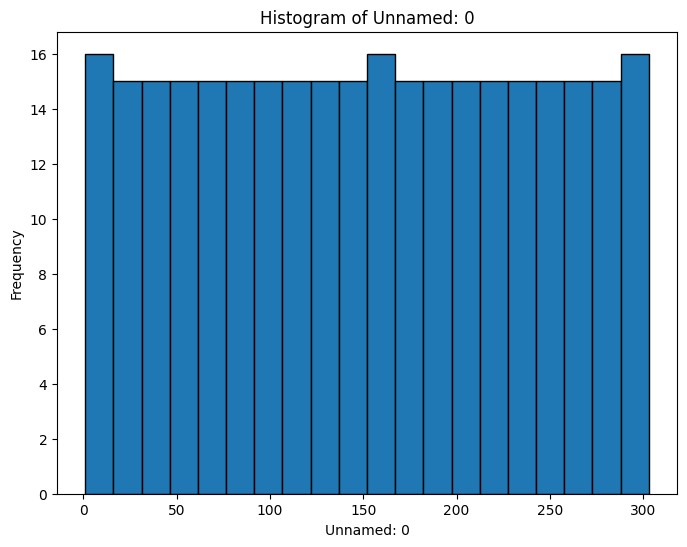

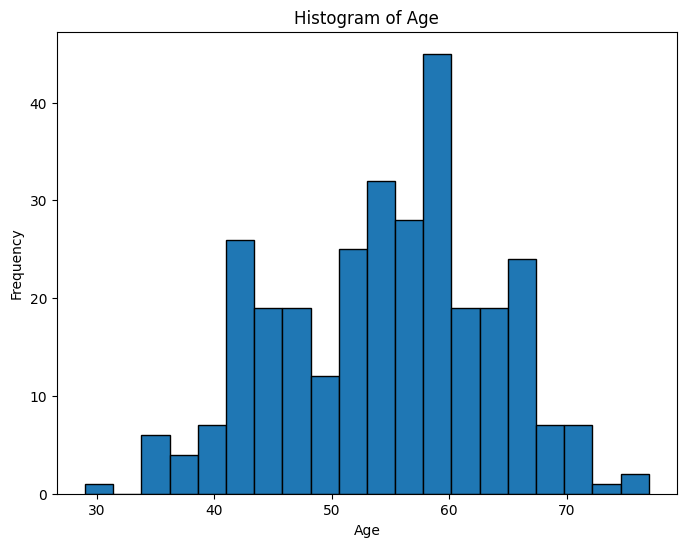

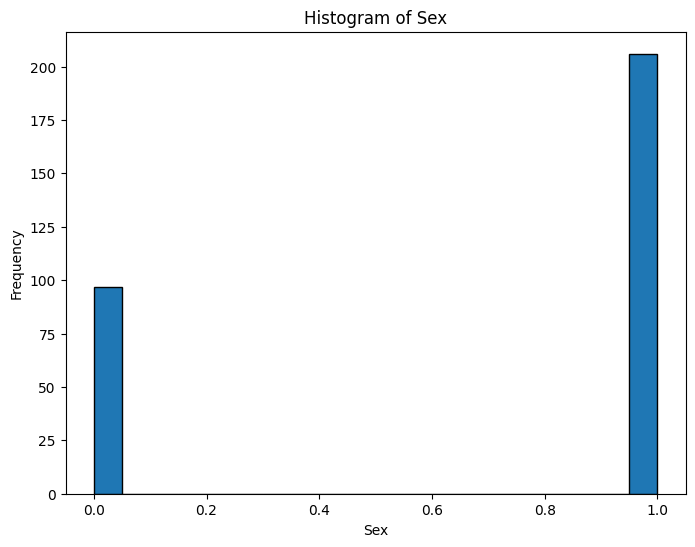

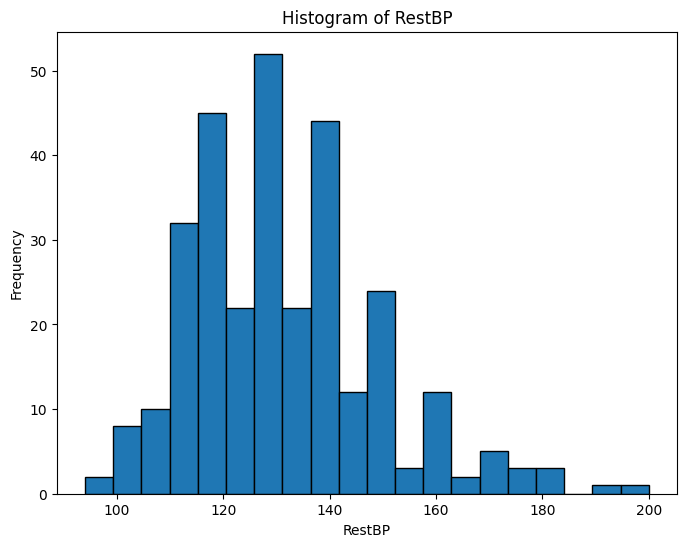

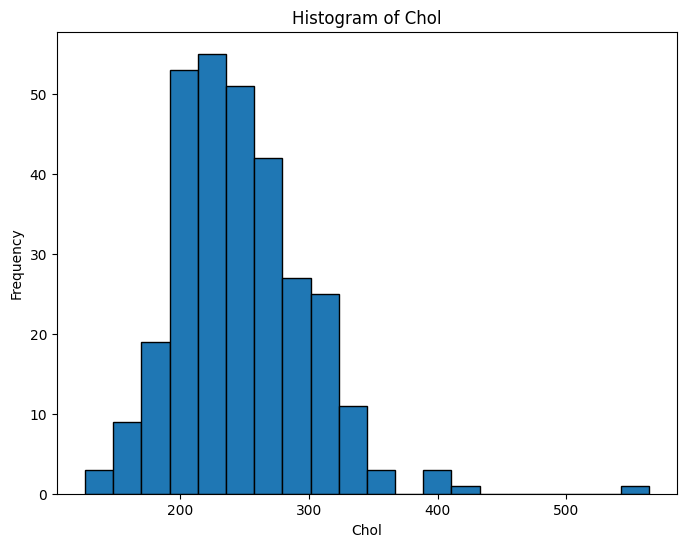

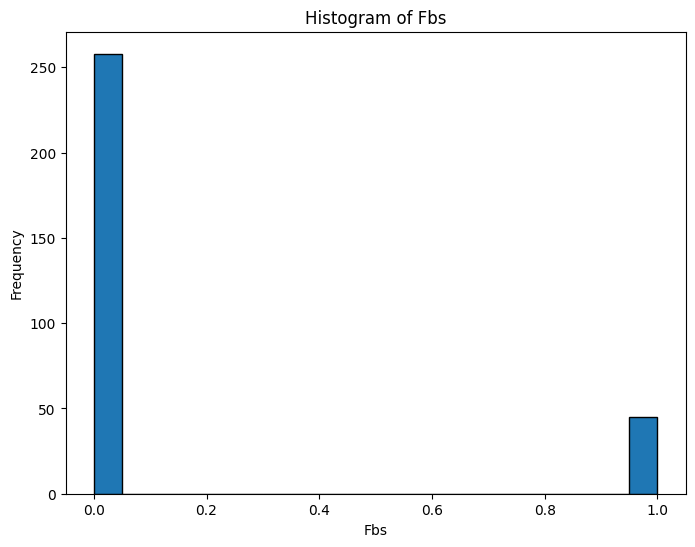

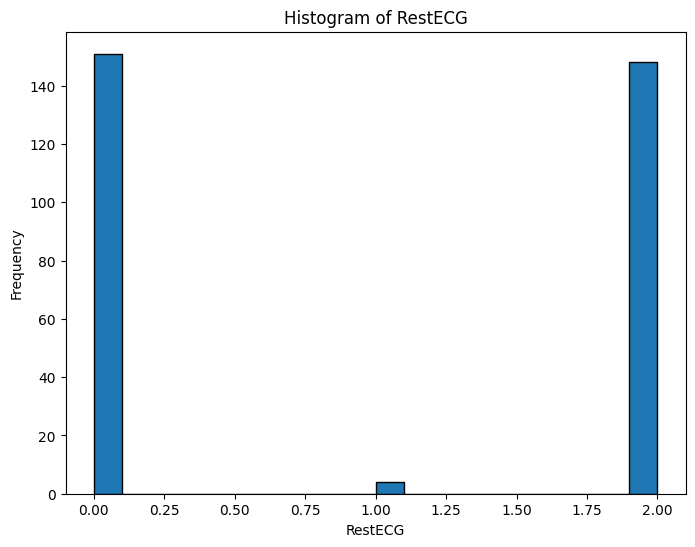

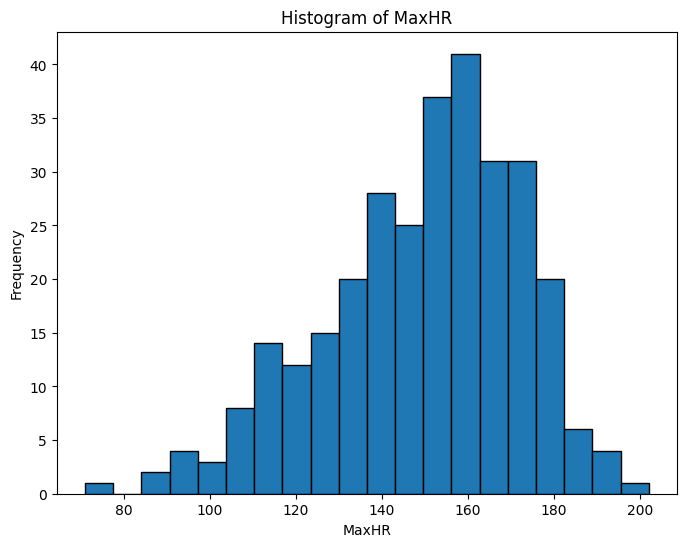

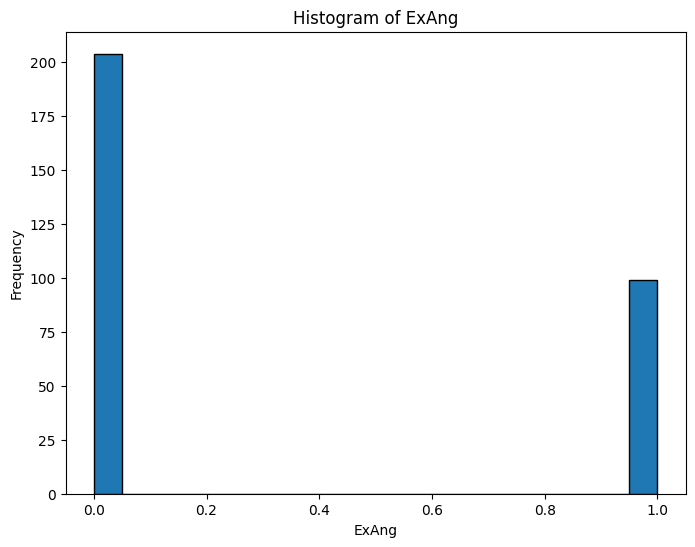

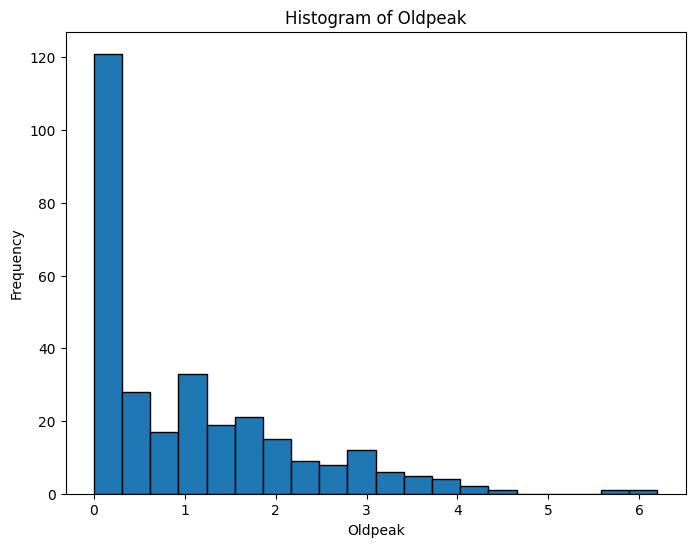

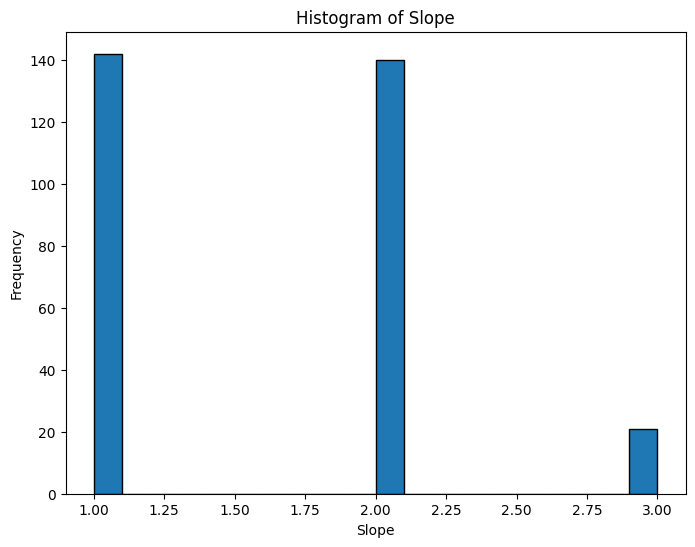

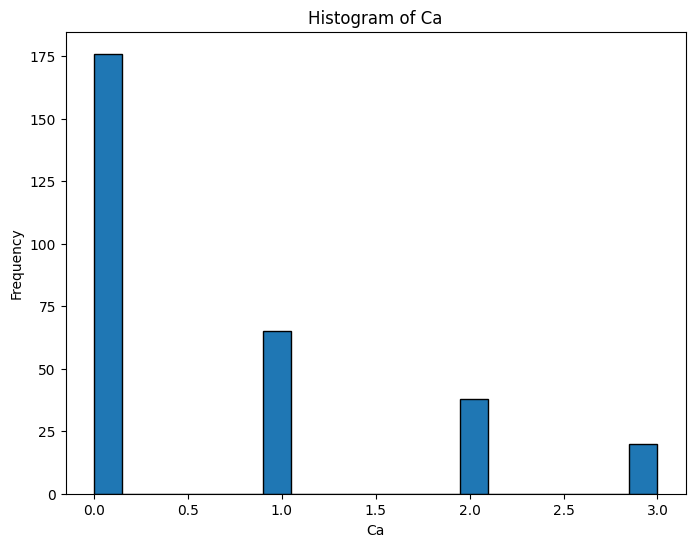

In [ ]:

for column in data.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(data[column], bins=20, edgecolor='black')  # Adjust number of bins
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

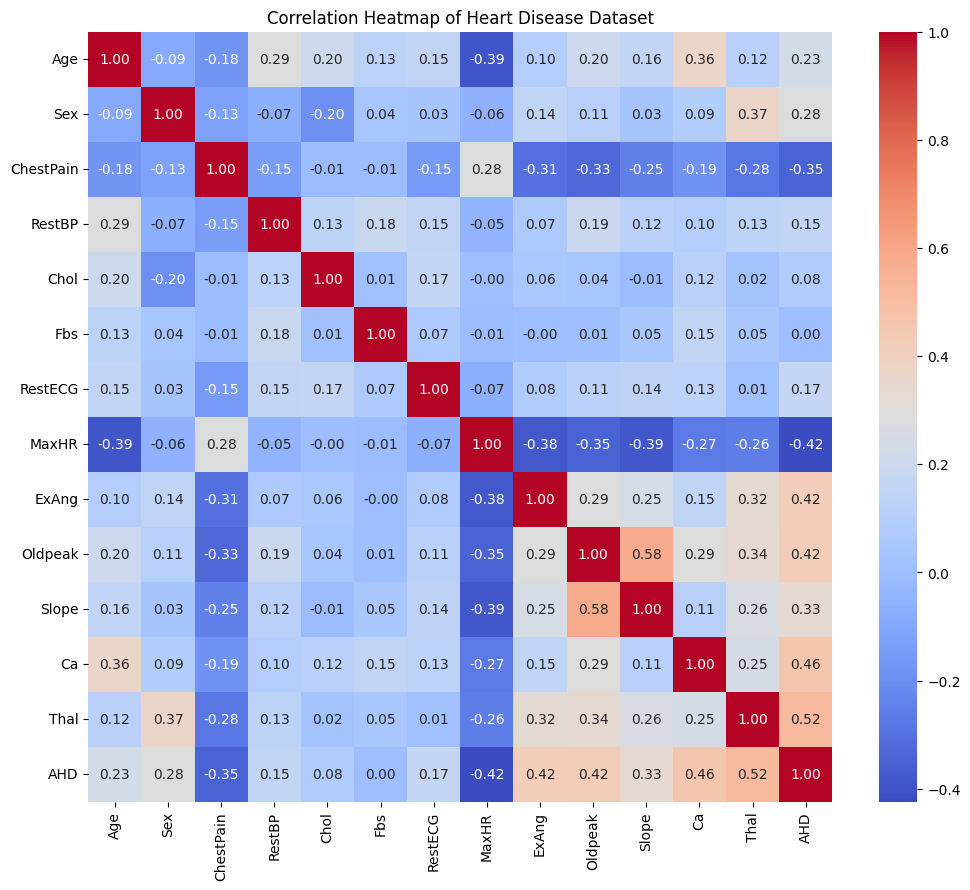

In [ ]:

# Load the data (assuming you are loading from a CSV file)
# Replace 'data.csv' with your actual file path or data source if needed
data = pd.read_csv('/content/Heart.csv')

# Mapping for categorical string values in the dataset
mappings = {
    'ChestPain': {
        'typical': 1,
        'asymptomatic': 2,
        'nonanginal': 3,
        'nontypical': 4
    },
    'Thal': {
        'normal': 1,
        'fixed': 2,
        'reversable': 3
    },
    'AHD': {
        'Yes': 1,
        'No': 0
    }
}

# Apply the mappings to the relevant columns
for col, mapping in mappings.items():
    if col in data.columns:
        data[col] = data[col].map(mapping)

# Drop any non-essential columns (e.g., 'Unnamed: 0' if it is an index column)
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Check for any NaN values created by the mapping (if any string values were unmapped)
data = data.dropna()  # Drop rows with NaN values after mapping if they exist

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()


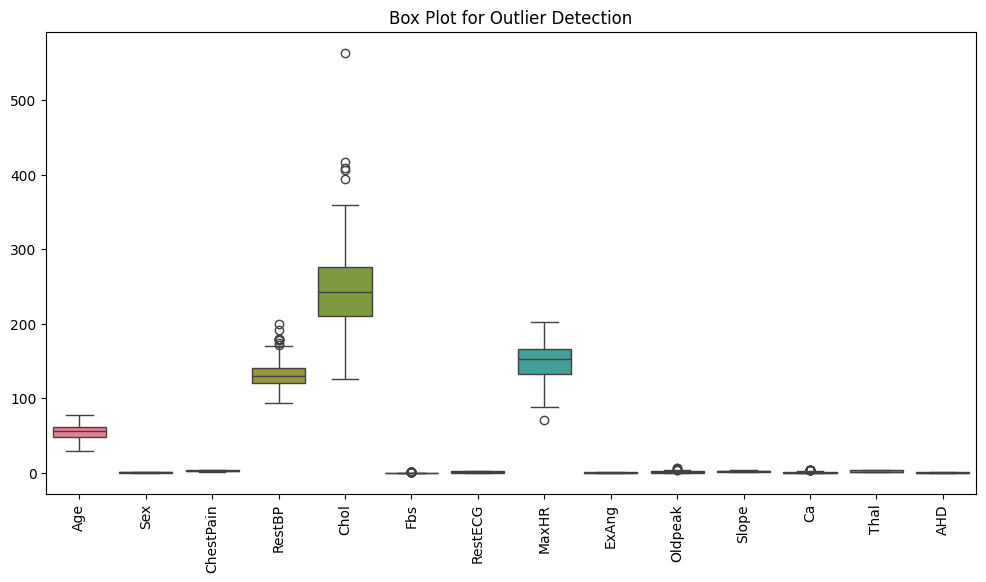

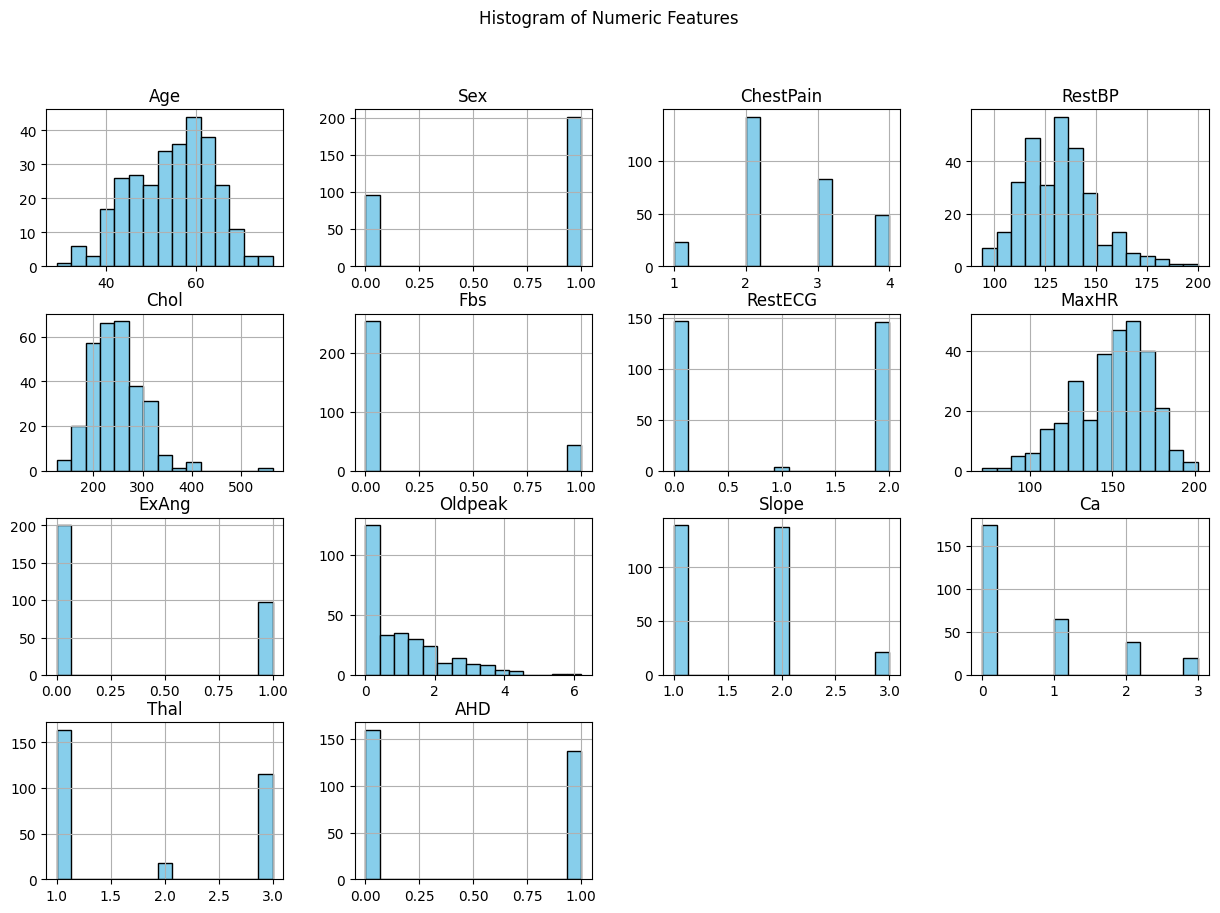

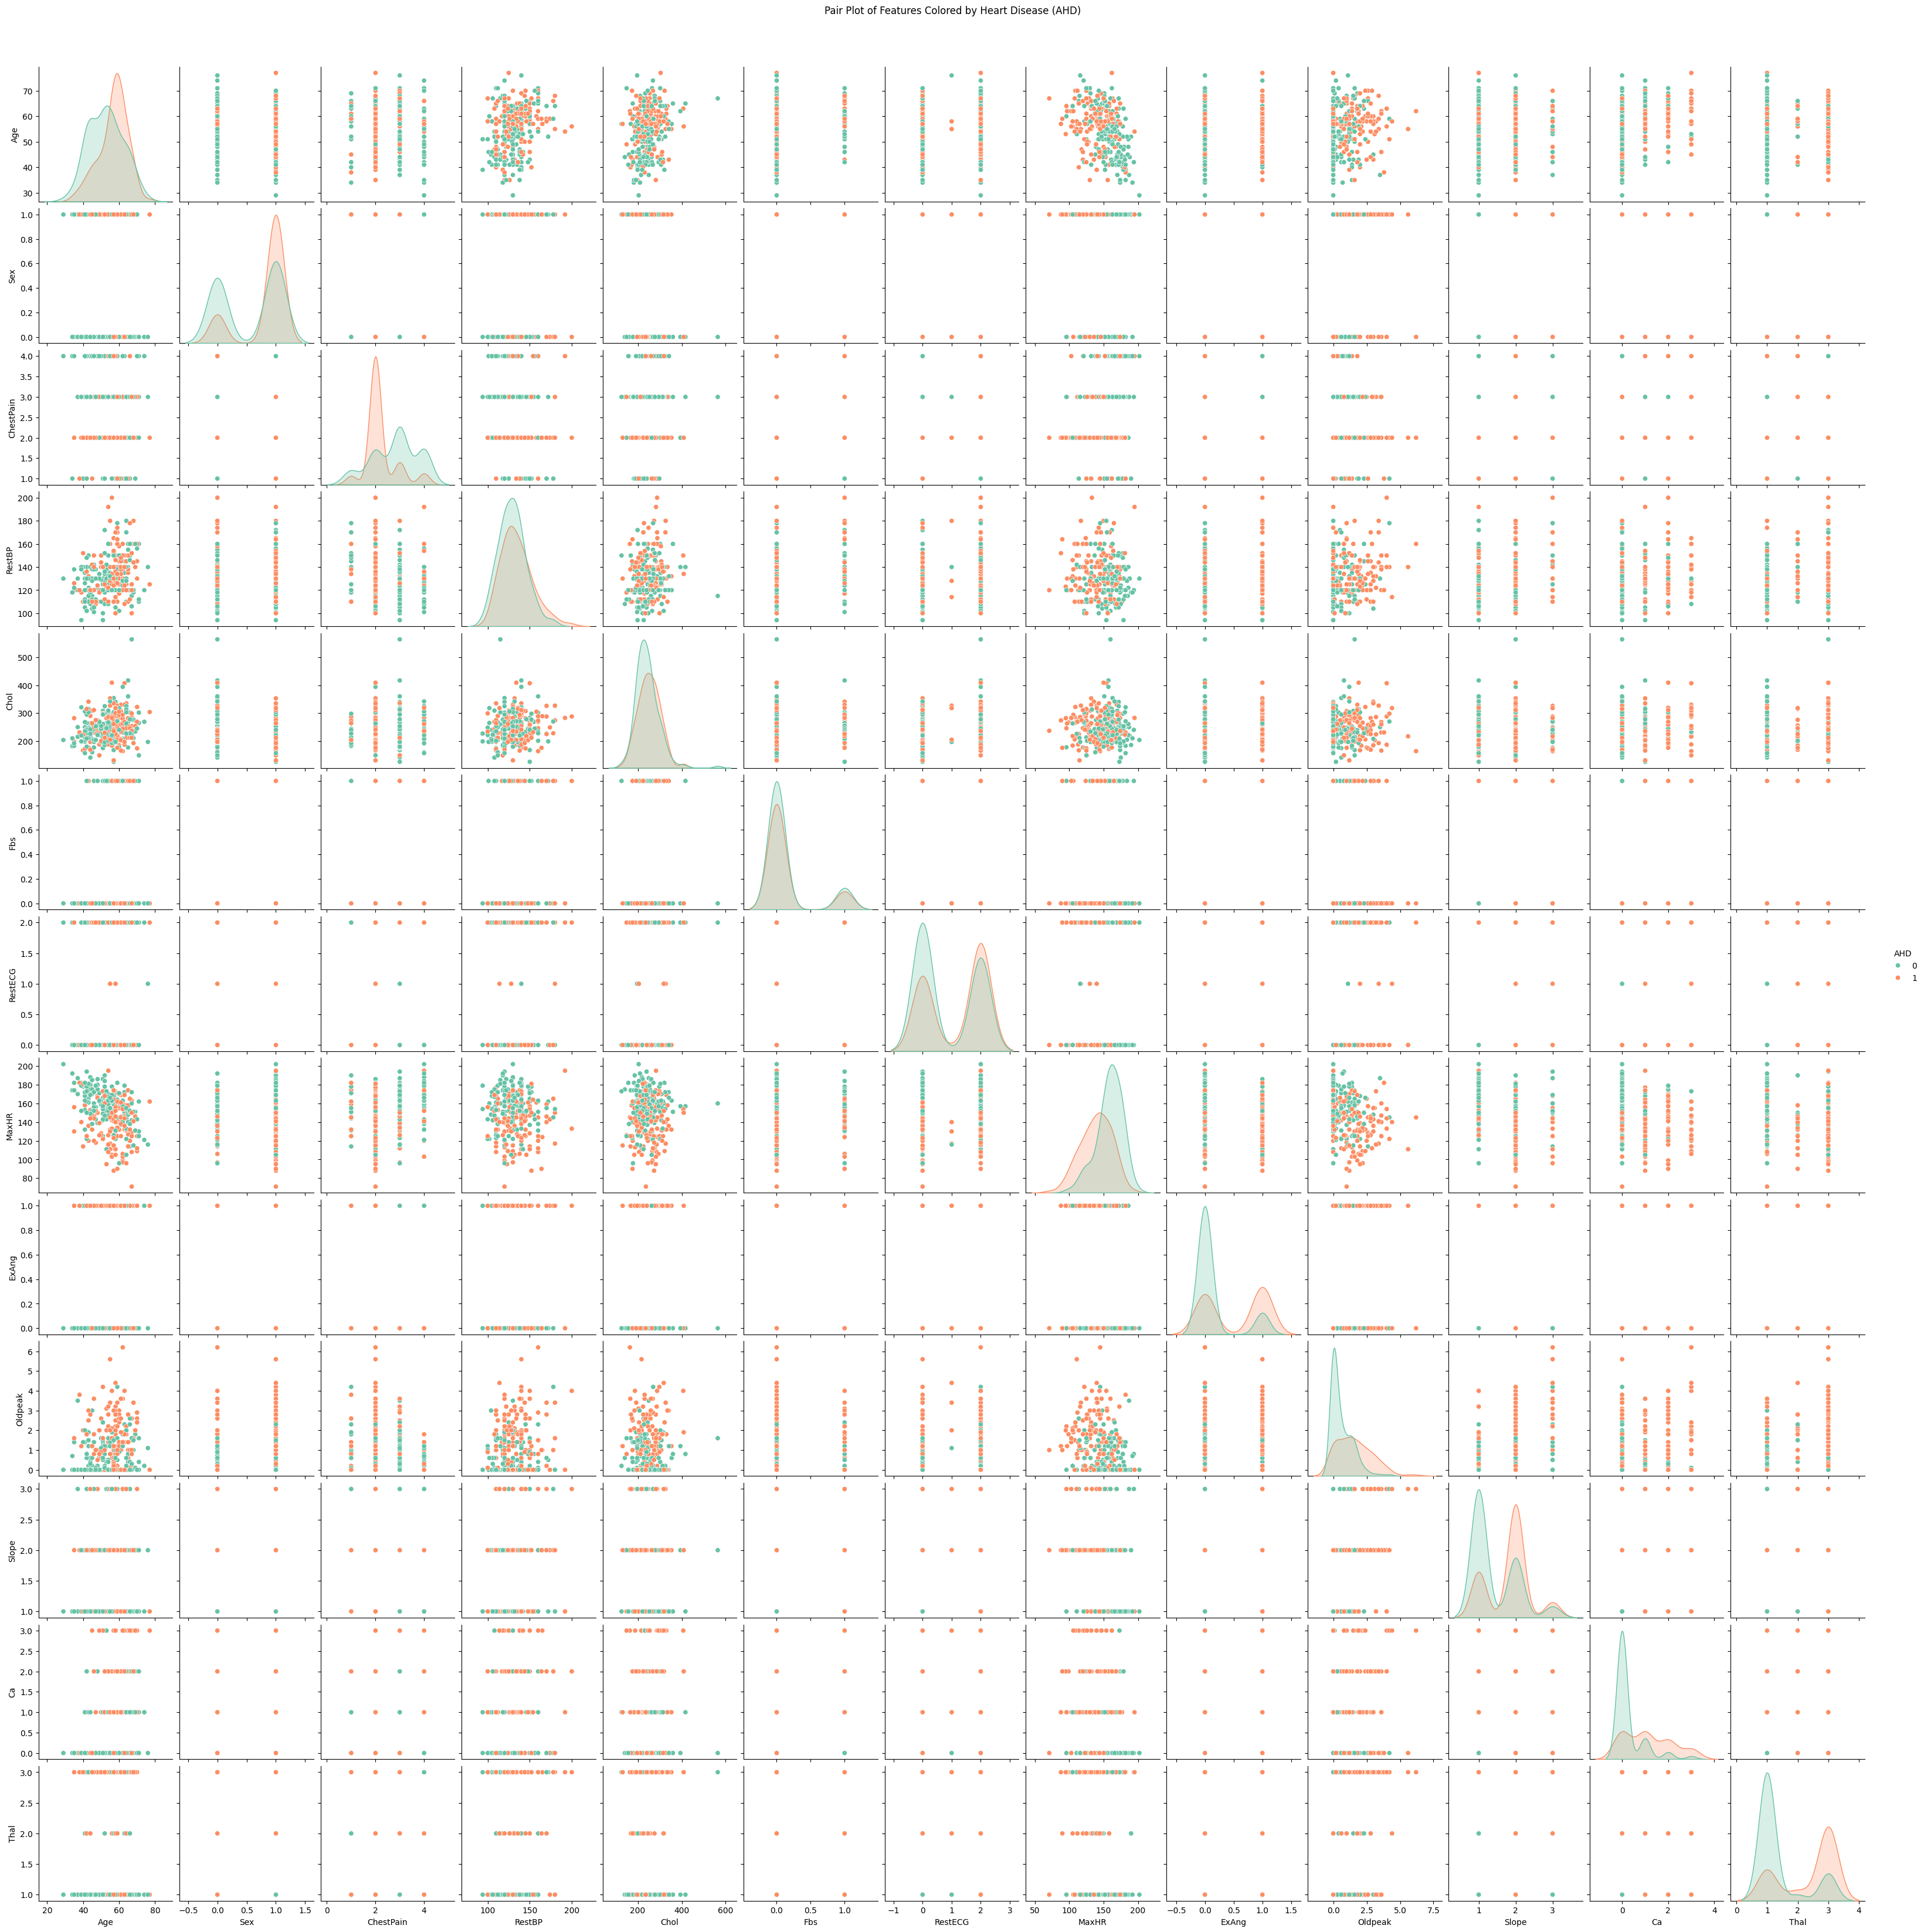

<ipython-input-1-096c5cdbf83b>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AHD', y=col, data=data, palette="muted")
<ipython-input-1-096c5cdbf83b>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AHD', y=col, data=data, palette="muted")
<ipython-input-1-096c5cdbf83b>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AHD', y=col, data=data, palette="muted")
<ipython-input-1-096c5cdbf83b>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

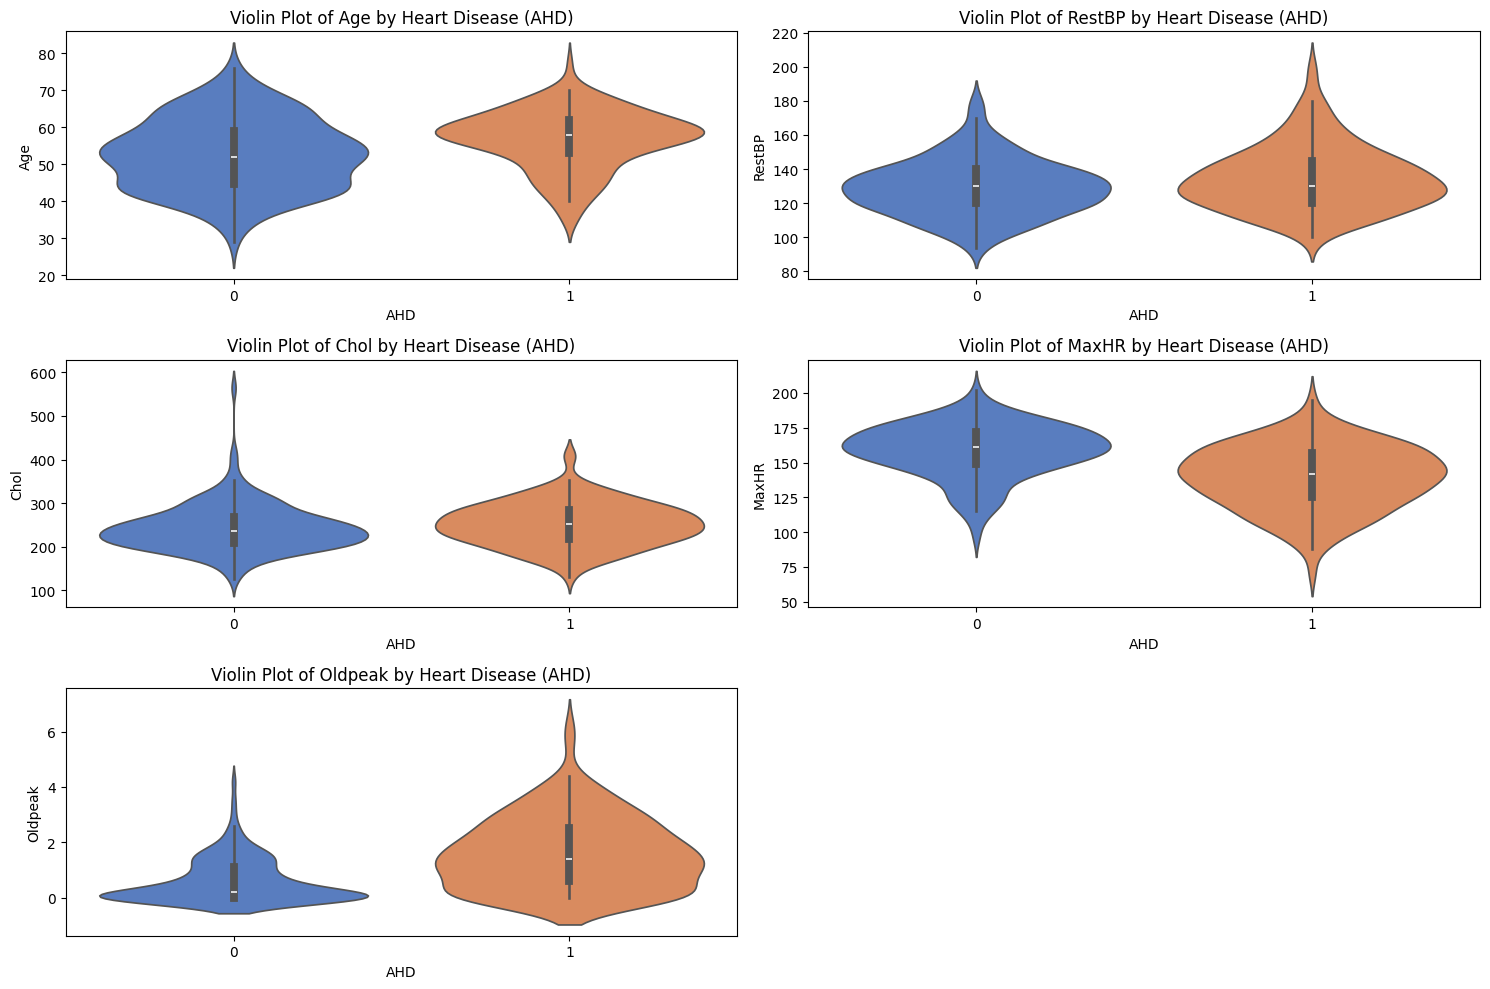

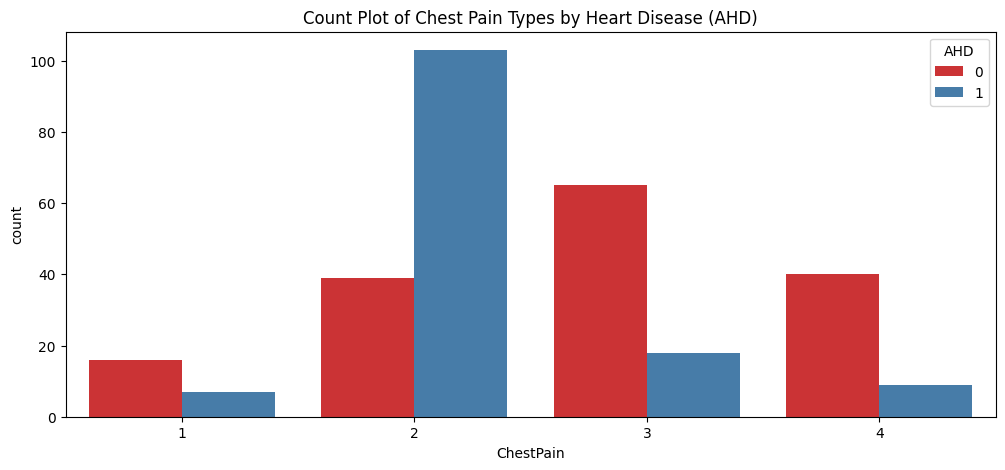

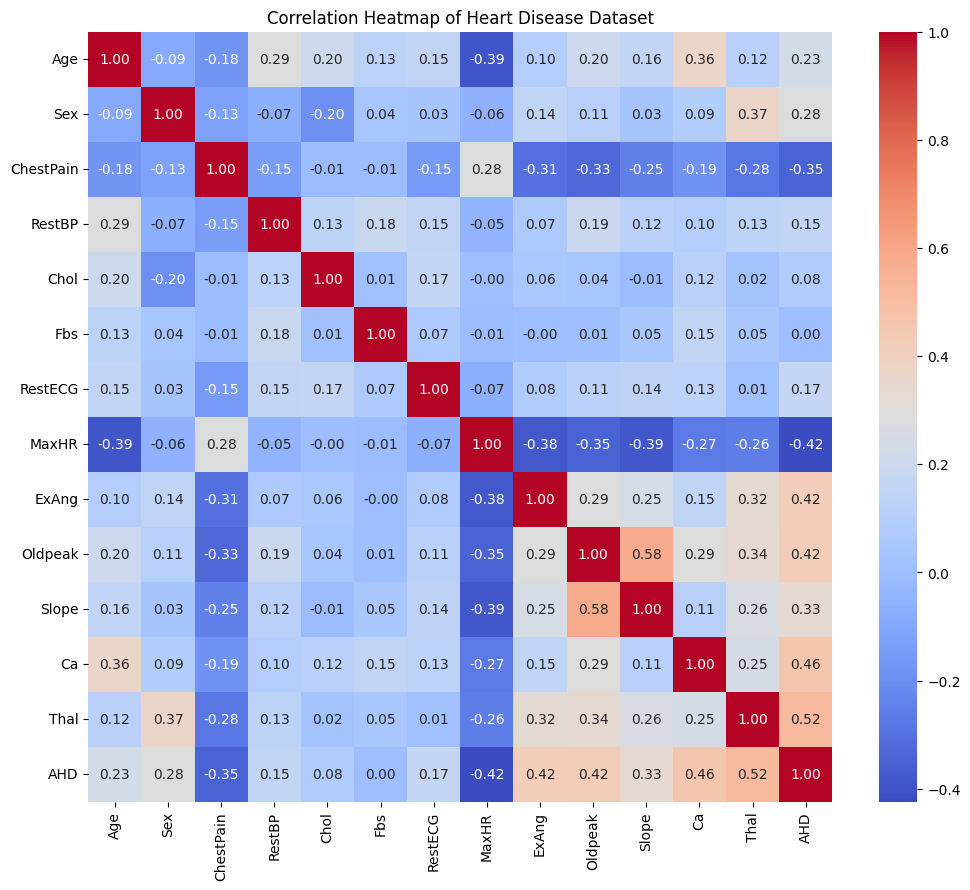

In [ ]:

# Load the data
data = pd.read_csv('/content/Heart.csv')

# Mapping for categorical string values
mappings = {
    'ChestPain': {
        'typical': 1,
        'asymptomatic': 2,
        'nonanginal': 3,
        'nontypical': 4
    },
    'Thal': {
        'normal': 1,
        'fixed': 2,
        'reversable': 3
    },
    'AHD': {
        'Yes': 1,
        'No': 0
    }
}

# Apply the mappings
for col, mapping in mappings.items():
    if col in data.columns:
        data[col] = data[col].map(mapping)

# Drop non-essential columns if any
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Drop any NaN values after mapping
data = data.dropna()

# 1. Box Plot: Detect outliers in numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Box Plot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

# 2. Histograms: Check distribution of each numeric variable
data.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Numeric Features")
plt.show()

# 3. Pair Plot: Visualize pairwise relationships
sns.pairplot(data, hue="AHD", diag_kind='kde', palette="Set2")
plt.suptitle("Pair Plot of Features Colored by Heart Disease (AHD)", y=1.02)
plt.show()

# 4. Violin Plot: Distribution of numeric columns by target variable (AHD)
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']):
    plt.subplot(3, 2, i + 1)
    sns.violinplot(x='AHD', y=col, data=data, palette="muted")
    plt.title(f"Violin Plot of {col} by Heart Disease (AHD)")
plt.tight_layout()
plt.show()

# 5. Count Plot: Distribution of ChestPain and AHD
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='ChestPain', hue='AHD', palette='Set1')
plt.title("Count Plot of Chest Pain Types by Heart Disease (AHD)")
plt.show()

# 6. Heatmap (Correlation): Visualize correlations for deeper insights
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()


In [ ]:
data = pd.read_csv('/content/Heart.csv')

In [ ]:
data.notnull()

Unnamed: 0   Age   Sex  ChestPain  RestBP  Chol   Fbs  RestECG  MaxHR  \
0          True  True  True       True    True  True  True     True   True   
1          True  True  True       True    True  True  True     True   True   
2          True  True  True       True    True  True  True     True   True   
3          True  True  True       True    True  True  True     True   True   
4          True  True  True       True    True  True  True     True   True   
..          ...   ...   ...        ...     ...   ...   ...      ...    ...   
298        True  True  True       True    True  True  True     True   True   
299        True  True  True       True    True  True  True     True   True   
300        True  True  True       True    True  True  True     True   True   
301        True  True  True       True    True  True  True     True   True   
302        True  True  True       True    True  True  True     True   True   

     ExAng  Oldpeak  Slope     Ca  Thal   AHD  
0     True     True   True   True  True  True  
1     True     True   True   True  True  True  
2     True     True   True   True  True  True  
3     True     True   True   True  True  True  
4     True     True   True   True  True  True  
..     ...      ...    ...    ...   ...   ...  
298   True     True   True   True  True  True  
299   True     True   True   True  True  True  
300   True     True   True   True  True  True  
301   True     True   True   True  True  True  
302   True     True   True  False  True  True  

[303 rows x 15 columns]

In [ ]:
data.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [ ]:
x = data.drop('AHD', axis=1)  # Assuming 'AHD' is the target column
y = data['AHD']

In [ ]:
print("Image Data Shape", data.shape)  # Replace digits.data with data
print("Label Data Shape", y.shape)    # Replace digits.target with y

Image Data Shape (303, 15)
Label Data Shape (303,)


#**Logistic Regression**

Accuracy: 0.9016393442622951
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



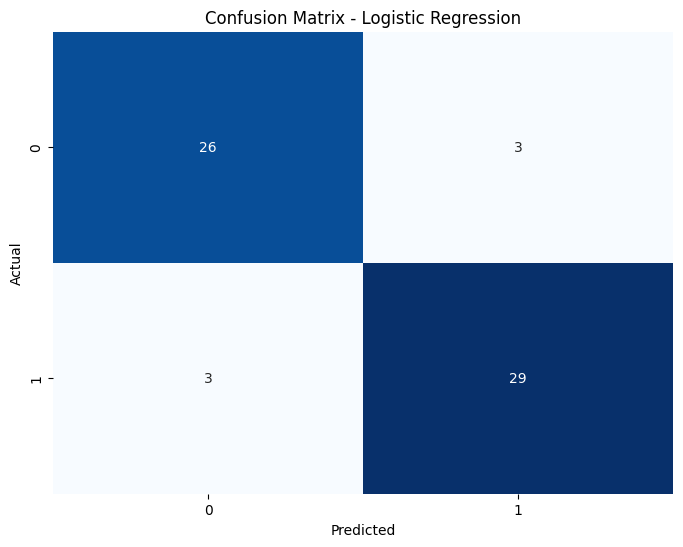

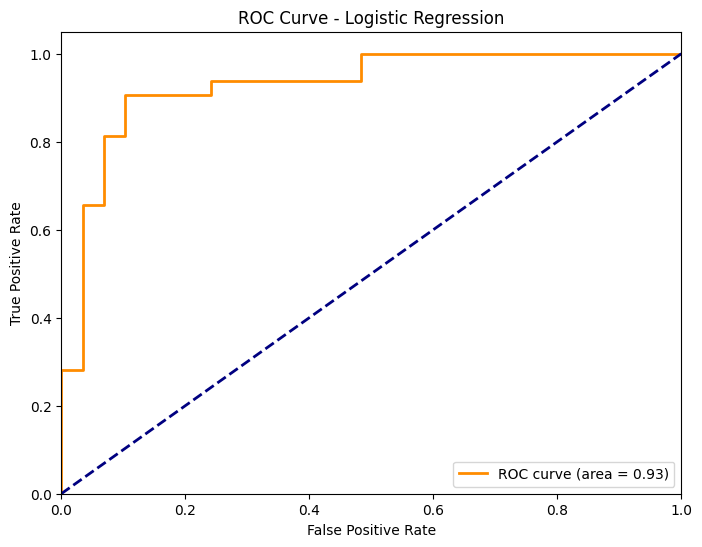

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
df = pd.read_csv('/content/Heart.csv')

# Define features (x) and target (y)
# Assuming 'AHD' is the target variable, and all others are features
x = df.drop(columns=['AHD'])
y = df['AHD'].map({'Yes': 1, 'No': 0})  # Convert 'AHD' column to numeric

# Separate numeric and categorical columns
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values by imputing most frequent
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the Logistic Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC curve and AUC
y_prob = pipeline.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


#**K-Nearest Neighbor(KNN) Algorithm**

Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



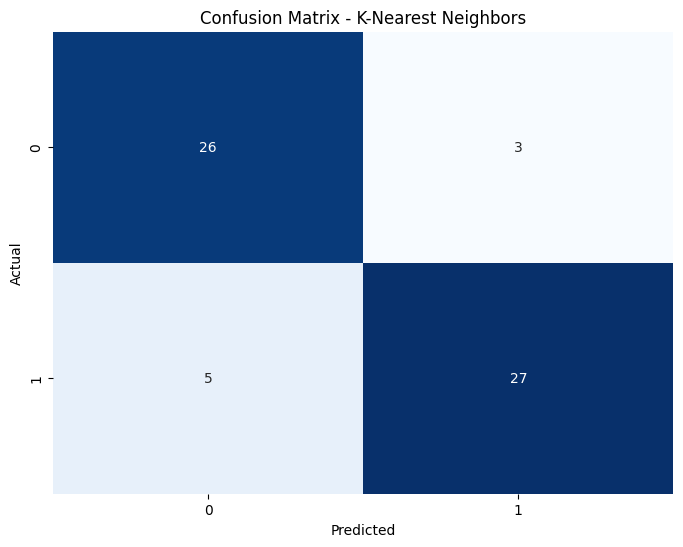

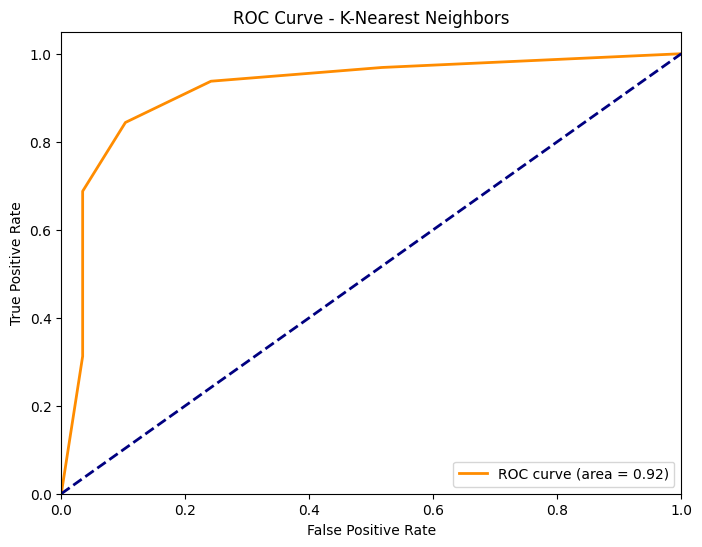

In [ ]:


# Load the dataset
df = pd.read_csv('/content/Heart.csv')

# Define features (x) and target (y)
# Assuming 'AHD' is the target variable, and all others are features
x = df.drop(columns=['AHD'])
y = df['AHD'].map({'Yes': 1, 'No': 0})  # Convert 'AHD' column to numeric

# Separate numeric and categorical columns
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values by imputing most frequent
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the KNN model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # KNN with k=5, can be tuned
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

# ROC curve and AUC
y_prob = pipeline.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()


#**Naive bayes Algorithm**

Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



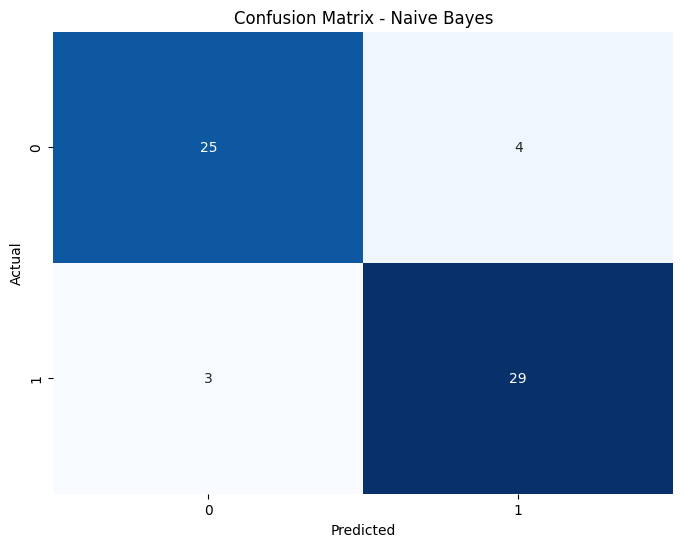

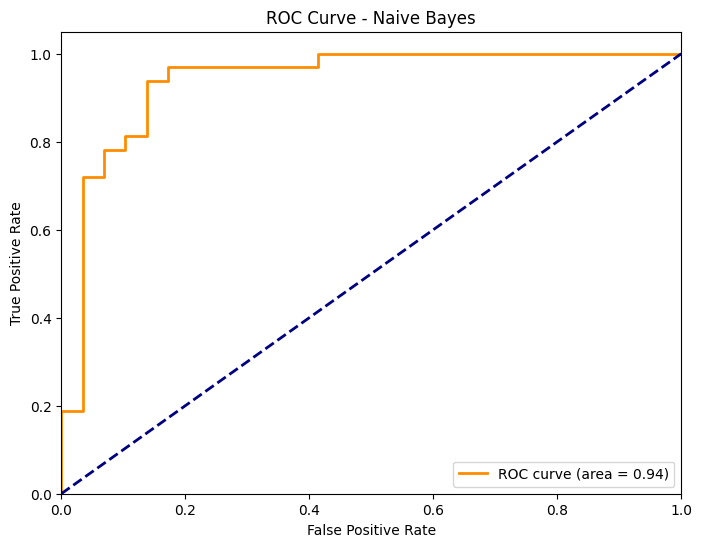

In [ ]:

# Load the dataset
df = pd.read_csv('/content/Heart.csv')

# Define features (x) and target (y)
x = df.drop(columns=['AHD'])
y = df['AHD'].map({'Yes': 1, 'No': 0})

# Separate numeric and categorical columns
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with the mean
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the Naive Bayes model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# ROC curve and AUC
y_prob = pipeline.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


#**Random Forest Algorithm**

Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



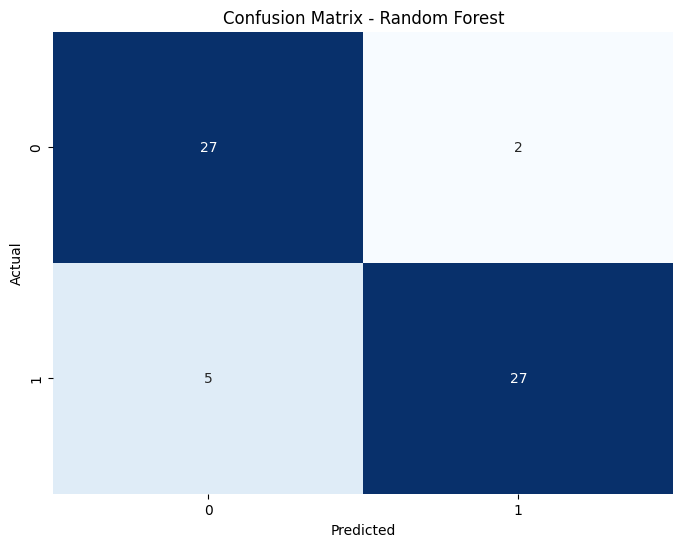

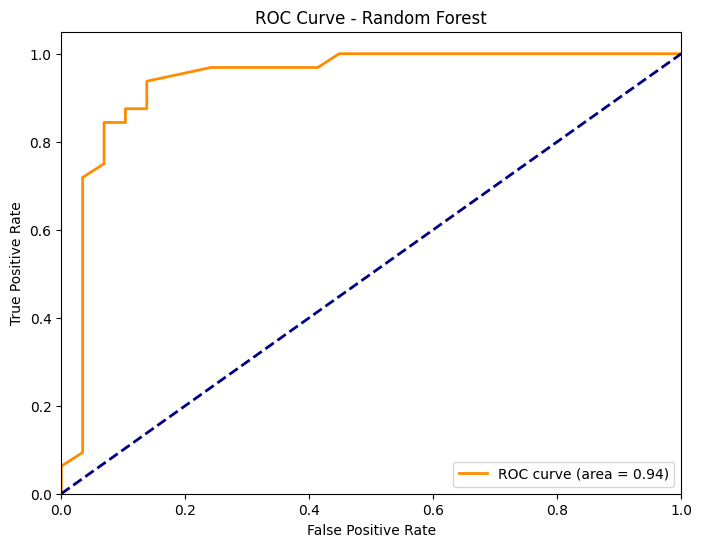

In [ ]:

# Load the dataset
df = pd.read_csv('/content/Heart.csv')

# Define features (x) and target (y)
# Assuming 'AHD' is the target variable, and all others are features
x = df.drop(columns=['AHD'])
y = df['AHD'].map({'Yes': 1, 'No': 0})  # Convert 'AHD' column to numeric

# Separate numeric and categorical columns
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values by imputing most frequent
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC curve and AUC
y_prob = pipeline.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


#**Support Vector Machine (SVM) Algorithm**

Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



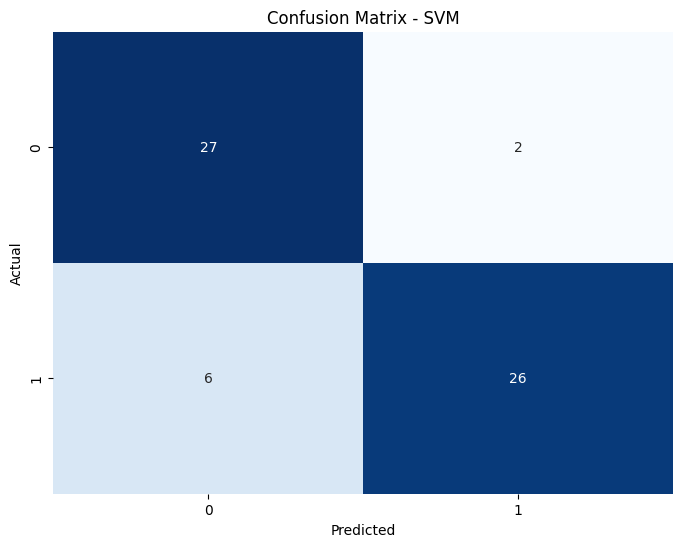

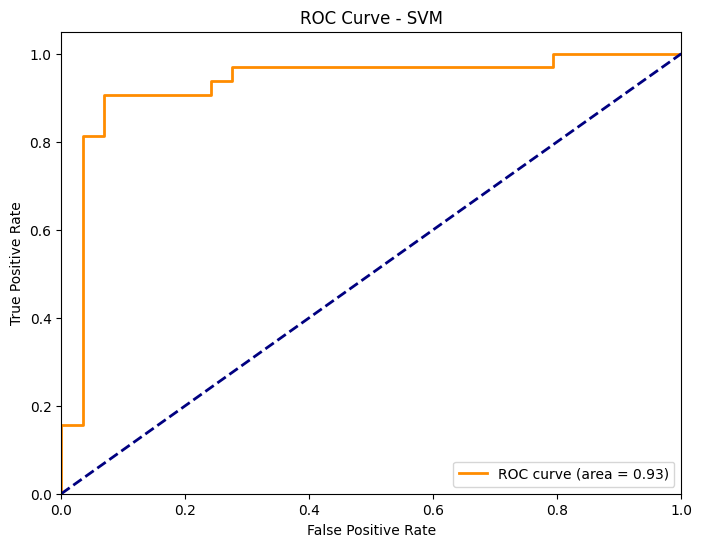

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Heart.csv')

# Define features (x) and target (y)
x = df.drop(columns=['AHD'])
y = df['AHD'].map({'Yes': 1, 'No': 0})  # Convert 'AHD' column to numeric

# Separate numeric and categorical columns
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values by imputing most frequent
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and the SVM model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))  # Enable probability for ROC curve
])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# ROC curve and AUC
y_prob = pipeline.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()


# **Comparing**


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0

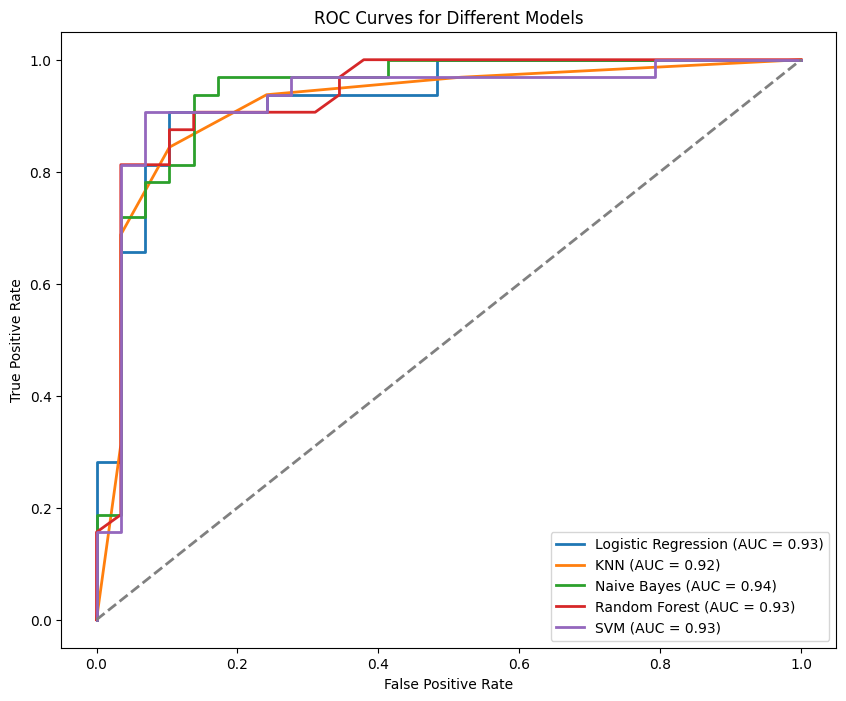

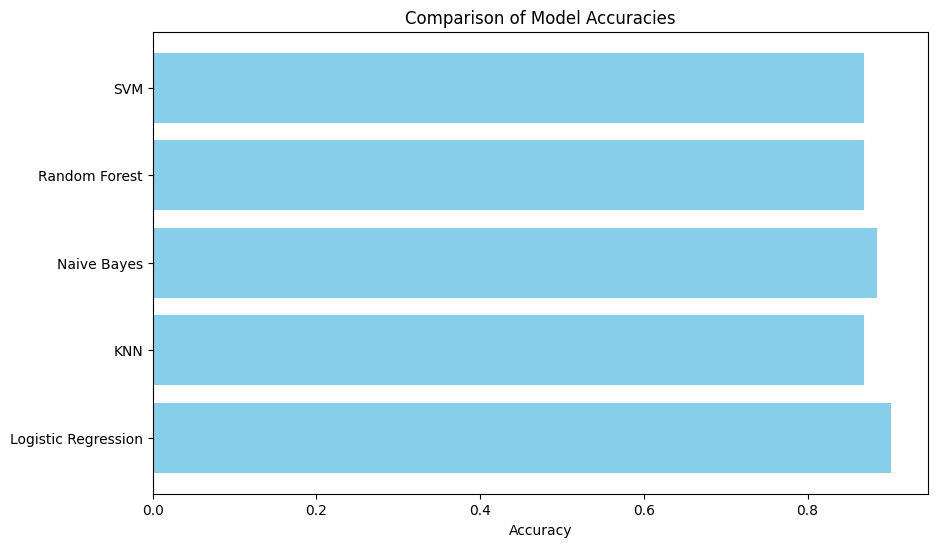

In [ ]:


# Load the dataset
df = pd.read_csv('/content/Heart.csv')

# Define features (x) and target (y)
x = df.drop(columns=['AHD'])
y = df['AHD'].map({'Yes': 1, 'No': 0})  # Convert 'AHD' column to numeric

# Separate numeric and categorical columns
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dictionary to store metrics for each model
model_metrics = {}

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# List of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Loop over each model, fit, predict, and collect metrics
plt.figure(figsize=(10, 8))
for name, model in models.items():
    # Create a pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit the model
    pipeline.fit(x_train, y_train)

    # Predict and calculate metrics
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)
    model_metrics[name] = accuracy  # Store accuracy for each model

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # ROC curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize and show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

# Bar plot to compare model accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(model_metrics.keys()), list(model_metrics.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


In [7]:
import pandas as pd  # Import pandas library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv('/content/Heart.csv')

# Preprocessing
categorical_cols = ['ChestPain']
excluded_cols = ['Unnamed: 0', 'AHD']
numerical_cols = df.select_dtypes(include=['number']).columns.drop(
    [col for col in excluded_cols if col in df.columns], errors='ignore'
)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate numerical and encoded categorical features
X = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
y = df['AHD']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model (using scaled data)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Function to predict heart disease based on user input
def predict_heart_disease(input_data):
    # Create a DataFrame from the input data with appropriate columns
    input_df = pd.DataFrame([input_data])

    # One-hot encode the 'ChestPain' column in input data
    input_cat_encoded = pd.DataFrame(encoder.transform(input_df[['ChestPain']]),
                                     columns=encoder.get_feature_names_out(['ChestPain']))

    # Concatenate numerical and encoded categorical features
    input_final = pd.concat([input_df[numerical_cols].reset_index(drop=True), input_cat_encoded.reset_index(drop=True)], axis=1)

    # Impute missing values if necessary (optional here as user input is complete)
    input_final_imputed = imputer.transform(input_final)

    # Scale the numerical features
    input_df_scaled = scaler.transform(input_final_imputed)

    # Make prediction using KNN model
    prediction = knn.predict(input_df_scaled)[0]
    return prediction

# Collect user input for prediction
user_input = {
    'Age': int(input("Enter Age: ")),
    'Sex': int(input("Enter Sex (1 for male, 0 for female): ")),
    'ChestPain': input("Enter Chest Pain type (typical, asymptomatic, nonanginal, nontypical): "),
    'RestBP': int(input("Enter Resting Blood Pressure: ")),
    'Chol': int(input("Enter Cholesterol level: ")),
    'Fbs': int(input("Enter Fasting Blood Sugar (1 if > 120 mg/dl, 0 otherwise): ")),
    'RestECG': int(input("Enter Resting ECG result (0, 1, or 2): ")),
    'MaxHR': int(input("Enter Maximum Heart Rate Achieved: ")),
    'ExAng': int(input("Enter Exercise Induced Angina (1 for yes, 0 for no): ")),
    'Oldpeak': float(input("Enter Oldpeak (ST depression induced by exercise relative to rest): ")),
    'Slope': int(input("Enter the slope of the peak exercise ST segment (1, 2, or 3): ")),
    'Ca': int(input("Enter number of major vessels (0-3): ")),
    'Thal': int(input("Enter Thalassemia status (3, 6, or 7): "))
}

# Predict heart disease based on user input
prediction = predict_heart_disease(user_input)
print("Heart Disease Prediction:", prediction)


Enter Age: 56
Enter Sex (1 for male, 0 for female): 1
Enter Chest Pain type (typical, asymptomatic, nonanginal, nontypical): nontypical
Enter Resting Blood Pressure: 120
Enter Cholesterol level: 236
Enter Fasting Blood Sugar (1 if > 120 mg/dl, 0 otherwise): 0
Enter Resting ECG result (0, 1, or 2): 0
Enter Maximum Heart Rate Achieved: 178
Enter Exercise Induced Angina (1 for yes, 0 for no): 0
Enter Oldpeak (ST depression induced by exercise relative to rest): 0.5
Enter the slope of the peak exercise ST segment (1, 2, or 3): 1
Enter number of major vessels (0-3): 0
Enter Thalassemia status (3, 6, or 7): 6
Heart Disease Prediction: No


# **Conclusion**

 Through the experiment, we successfully developed a predictive model for heart disease by training and comparing multiple machine learning algorithms. The analysis of evaluation metrics and visualizations revealed that **Random Forest** provided the most accurate results in predicting heart disease based on the dataset. This predictive model could assist healthcare professionals by providing a preliminary indication of heart disease risk based on specific clinical and demographic parameters, thereby supporting early intervention and personalized treatment.